## Spam classification using Naive Bayes in ML

In [58]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer      # BOW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import joblib
print('All necessary library are imported !')

# SOME NLP NECESSARY LIBRARY
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer     # STEMMING

All necessary library are imported !


In [41]:
x , y = [],[]
with open('Data/SMSSpamCollection.txt','r') as file:
    data = file.read()
    for data_item in data.split('\n') :
        if len(data_item.split('\t')) == 2:
            y.append(data_item.split('\t')[0])
            x.append(data_item.split('\t')[1])
print('Successfully read the data from text file and splitted into X and Y')


Successfully read the data from text file and splitted into X and Y


In [42]:
len(x),len(y)


(5574, 5574)

In [43]:
# preparing a dataframe from our read data.

data_dict = {'mail_message':x,'label':y}
df = pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [45]:
for i in range(0,len(df)):
    mesage = re.sub('[^a-zA-Z]',' ',df['mail_message'][i])
    mesage = mesage.lower()
    df['mail_message'][i] = mesage
df.head(10)
#Text cleaning processing and lowerizing the 

,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham
5,freemsg hey there darling it s been week s n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request melle melle oru minnamin...,ham
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam


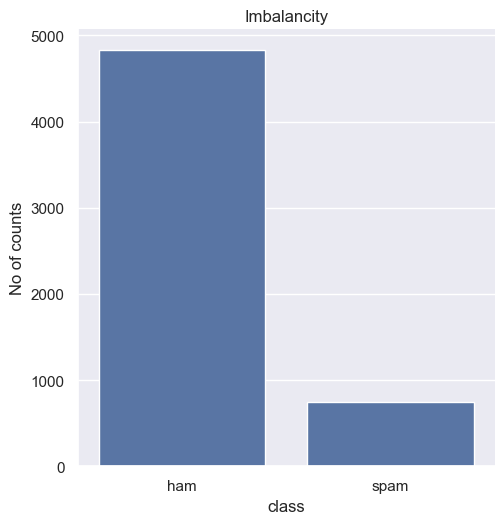

In [71]:
classs = list(df['label'].value_counts().index)
valu = list(df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Imbalancity')
plt.xlabel('class')
plt.ylabel('No of counts')
plt.show()

In [72]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [76]:
df.sample(2000)

(2000, 2)

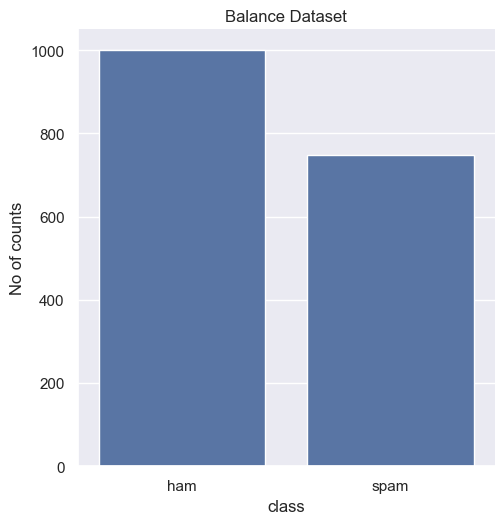

In [85]:
#filtering the dataset
ham = df[df['label']=='ham'].sample(1000)
spam = df[df['label']=='spam']

#concating the dataset
balance_df = pd.concat([ham,spam])

#visualaizing the datset
classs = list(balance_df['label'].value_counts().index)
valu = list(balance_df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Balance Dataset')
plt.xlabel('class')
plt.ylabel('No of counts')
plt.show()


In [88]:
#label encoding of our Dependent variable
balance_df['label'] = balance_df['label'].map({'ham':0,'spam':1})

In [89]:
#checking the missing value
balance_df.isnull().sum()

mail_message    0
label           0
dtype: int64

In [94]:
print(f"Duplicates in our dataset are :- {balance_df.duplicated().sum()}")
print(f"Shape of our Dataset before remove Duplicates :- {balance_df.shape}")


Duplicates in our dataset are :- 135
Shape of our Dataset before remove Duplicates :- (1747, 2)


In [95]:
balance_df.drop_duplicates(inplace=True)
# Duplicates are removed

In [96]:
print(f"Duplicates in our dataset are :- {balance_df.duplicated().sum()}")
print(f"Shape of our Dataset after remove Duplicates :- {balance_df.shape}")

Duplicates in our dataset are :- 0
Shape of our Dataset after remove Duplicates :- (1612, 2)


In [100]:
# Splitted The Data into X and Y
x = balance_df['mail_message']
y = balance_df['label']

In [101]:
x.head()

1588    dont search love  let love find u  thats why i...
4737     not for possession  especially not first offense
3295    beautiful tomorrow never comes   when it comes...
2839    were trying to find a chinese food place aroun...
327                       hi da  how is the todays class 
Name: mail_message, dtype: object

In [102]:
y.head()

1588    0
4737    0
3295    0
2839    0
327     0
Name: label, dtype: int64

In [128]:
# prepares single list a of mails
x = x.values
x[0:5]


array(['dont search love  let love find u  thats why its called falling in love  bcoz u dont force yourself  u just fall and u know there is smeone to hold u    bslvyl',
       'not for possession  especially not first offense',
       'beautiful tomorrow never comes   when it comes  it s already today   in the hunt of beautiful tomorrow don t waste your wonderful today   goodmorning  ',
       'were trying to find a chinese food place around here',
       'hi da  how is the todays class '], dtype=object)

In [129]:
x.shape

(1612,)

In [131]:
# intialaizing the bag of word class class
BOW_obj = CountVectorizer(max_features=2000,stop_words='english')


In [132]:
x.shape,type(x)

((1612,), numpy.ndarray)

In [133]:
x_transformed = BOW_obj.fit_transform(x)

In [134]:
x_transformed

<1612x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 12560 stored elements in Compressed Sparse Row format>

In [137]:
#sparse metrix to dense metrix conversion.
dense_matrix = x_transformed.toarray()
dense_matrix.shape


(1612, 2000)

In [139]:
# checking the shape of the data before splitting into training and testing
x = dense_matrix
x.shape,     y.shape

(1612, 2000)

In [140]:
#train test split the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# MultinomialNB

In [141]:
MNB  = MultinomialNB()

In [142]:
MNB.fit(x_train,y_train)

MultinomialNB()

## accuracy

In [144]:
MNB.score(x_train,y_train).round(2)*100     # on training data

99.0

In [145]:
MNB.score(x_test,y_test).round(2)*100        # on testing data

96.0

## Prediction

In [146]:
pred = MNB.predict(x_test)

In [154]:
confusion_matrix(y_test,pred)

array([[175,   6],
       [  8, 134]], dtype=int64)

<Axes: >

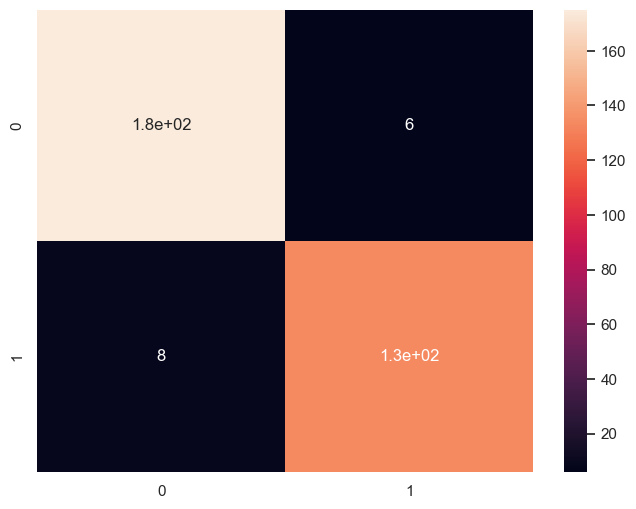

In [153]:
# sns.set(rc = {'figure.fisize',(8,8)})
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [155]:
print(classification_report(y_test,pred))
# classification report for model evaluation

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       181
           1       0.96      0.94      0.95       142

    accuracy                           0.96       323
   macro avg       0.96      0.96      0.96       323
weighted avg       0.96      0.96      0.96       323



In [59]:
pickle.dump(MNB,open('spamclassifier_MnB.pkl','wb'))
# to save the model

In [63]:
model=pickle.load(open('spamclassifier_MnB.pkl','rb'))
# to load the model

In [160]:
compare_dict = {'actual':y_test,'pred':pred}
comparison_df = pd.DataFrame(compare_dict)
comparison_df.head(30)

,actual,pred
3386,0,0
1895,1,1
131,0,0
962,1,1
3590,0,0
4985,1,1
1768,0,0
3838,0,0
4087,0,0
527,1,1


## Thankyou  ❤❤